In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Data Source
import yfinance as yf
from plotly.subplots import make_subplots
#Data viz
from datetime import date
import plotly.graph_objs as go
import pandas_ta as ta
from pylab import rcParams
plt.style.use('fivethirtyeight') 
from nsepy import get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class dataops:
    
    
    # def getdata( company, start_date, end_date):
    #     data = yf.download(company, start_date, end_date)
    #     return data
    
    
    def data2(company , periods,intervals):
        # get data from yahoo
        data = yf.download(tickers=company, period=periods, interval=intervals)
        return data
    
    def dataforoi(stock,start,end,end2):
        data_fut = get_history(symbol=stock,futures=True,start=start, end=end,expiry_date=date(2018,1,25))
        data_fut2 = get_history(symbol=stock,futures=True,start=start, end=end2,expiry_date=date(2018,2,22))
        
        
        
        
    def macd(df):
            df=df.copy()
            k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
        # Get the 12-day EMA of the closing price
            d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
        # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
            macd = k - d
        # Get the 9-Day EMA of the MACD for the Trigger line
            macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
        # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
            macd_h = macd - macd_s
        # Add all of our new values for the MACD to the dataframe
            df['macd'] = df.index.map(macd)
            df['macd_h'] = df.index.map(macd_h)
            df['macd_s'] = df.index.map(macd_s)
        # View our data
            pd.set_option("display.max_columns", None)
            return df    

In [69]:
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import datetime
class alpha:
    
    def startdating():
        # date_entry = input('Enter a start date in YYYY-MM-DD format')
        date_entry = '2020-10-01'
        year, month, day = map(int, date_entry.split('-'))
        date1 = datetime.date(year, month, day)
        return date1
    
    def enddating():
        # date_entry = input('Enter a end date in YYYY-MM-DD format')
        date_entry = '2022-10-01'
        year, month, day = map(int, date_entry.split('-'))
        date2 = datetime.date(year, month, day)
        return date2
    
    
        
    def alpha_data(comp):
        start=alpha.startdating()
        end=alpha.enddating()
        data = get_history(symbol=comp,start=start , end=end)
        data.columns
        data['alpha']= data['Deliverable Volume']/data['Trades']
        return(data)
# Plot the data['alpha'] values
    def show_alpha_data(data):
        plt.plot(data)
        plt.show()

In [70]:
df=alpha.alpha_data('HDFCBANK')
# print(type(date(2007, 1, 1)))20
print(df)

              Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                          
2020-10-01  HDFCBANK     EQ     1078.60  1090.10  1110.00  1090.10  1108.00   
2020-10-05  HDFCBANK     EQ     1106.95  1112.00  1132.00  1111.00  1112.50   
2020-10-06  HDFCBANK     EQ     1114.35  1135.05  1148.00  1126.20  1143.15   
2020-10-07  HDFCBANK     EQ     1144.10  1144.90  1164.85  1137.60  1160.50   
2020-10-08  HDFCBANK     EQ     1162.25  1180.00  1203.00  1163.35  1189.90   
...              ...    ...         ...      ...      ...      ...      ...   
2022-09-26  HDFCBANK     EQ     1446.15  1425.35  1436.45  1418.00  1429.80   
2022-09-27  HDFCBANK     EQ     1426.65  1432.40  1440.00  1407.00  1414.65   
2022-09-28  HDFCBANK     EQ     1413.85  1406.00  1410.60  1385.90  1387.00   
2022-09-29  HDFCBANK     EQ     1389.55  1396.30  1402.20  1378.80  1381.50   
2022-09-30  HDFCBANK     EQ     1382.35  1378.80  14

In [71]:
alpha5= df['alpha'].rolling(5).mean()
df['alpha5']=alpha5
df['alpha5']=df['alpha5'].shift(+1)
beta=(df['alpha']-df['alpha5'])/df['alpha5']*100
df['beta']=beta
beta_critical= df['beta'].mean()+df['beta'].std()
spike= df[df['beta']>beta_critical]


In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.freeze_panes=None
df= df.dropna()
df.columns
df.index = pd.to_datetime(df.index)
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,alpha,alpha5,beta
Date,,,,,,,,,,,,,,,,,
2020-10-09,HDFCBANK,EQ,1191.80,1201.00,1237.00,1191.65,1235.20,1233.55,1218.62,22486215,2.740215e+15,338324,8314015,0.3697,24.574121,20.574787,19.438035
2020-10-12,HDFCBANK,EQ,1233.55,1231.55,1242.75,1205.60,1214.50,1213.65,1220.43,9610277,1.172871e+15,192519,2412953,0.2511,12.533584,21.952131,-42.904933
2020-10-13,HDFCBANK,EQ,1213.65,1213.40,1222.45,1195.00,1195.25,1198.45,1206.34,9177015,1.107057e+15,183515,3940507,0.4294,21.472397,20.691464,3.774183
2020-10-14,HDFCBANK,EQ,1198.45,1195.55,1214.30,1175.50,1213.50,1211.50,1190.04,11291473,1.343725e+15,220645,4716259,0.4177,21.374874,22.538938,-5.164683
2020-10-15,HDFCBANK,EQ,1211.50,1214.20,1217.00,1164.00,1168.60,1169.25,1195.09,14123569,1.687896e+15,238649,6426038,0.4550,26.926733,23.406790,15.038129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,HDFCBANK,EQ,1446.15,1425.35,1436.45,1418.00,1429.80,1426.65,1426.27,4461743,6.363659e+14,183001,2489197,0.5579,13.602095,24.990204,-45.570291
2022-09-27,HDFCBANK,EQ,1426.65,1432.40,1440.00,1407.00,1414.65,1413.85,1423.81,6319850,8.998293e+14,181595,3034276,0.6029,16.709028,21.257947,-21.398672
2022-09-28,HDFCBANK,EQ,1413.85,1406.00,1410.60,1385.90,1387.00,1389.55,1397.25,5908066,8.255059e+14,215474,3384446,0.5729,15.706981,19.217152,-18.265822


In [111]:
from sklearn.preprocessing import MinMaxScaler
price = df[['Close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

In [112]:
price

,Close
Date,
2020-10-09,-0.752430
2020-10-12,-0.829050
2020-10-13,-0.887573
2020-10-14,-0.837328
2020-10-15,-1.000000
...,...
2022-09-26,-0.008952
2022-09-27,-0.058235
2022-09-28,-0.151795


In [113]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [114]:
# inverse transform xtest


In [115]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price, lookback)

In [116]:
x_test


array([[[-0.28751564],
        [-0.21031861],
        [-0.28251035],
        ...,
        [-0.52988738],
        [-0.47694677],
        [-0.44267976]],

       [[-0.21031861],
        [-0.28251035],
        [-0.24343055],
        ...,
        [-0.47694677],
        [-0.44267976],
        [-0.44306478]],

       [[-0.28251035],
        [-0.24343055],
        [-0.21917413],
        ...,
        [-0.44267976],
        [-0.44306478],
        [-0.54644335]],

       ...,

       [[ 0.21994417],
        [ 0.16623352],
        [ 0.21763404],
        ...,
        [ 0.21955915],
        [ 0.06612763],
        [-0.00895178]],

       [[ 0.16623352],
        [ 0.21763404],
        [ 0.2544037 ],
        ...,
        [ 0.06612763],
        [-0.00895178],
        [-0.05823467]],

       [[ 0.21763404],
        [ 0.2544037 ],
        [ 0.23245741],
        ...,
        [-0.00895178],
        [-0.05823467],
        [-0.15179517]]])

In [117]:
y_test 

array([[-0.44306478],
       [-0.54644335],
       [-0.41592069],
       [-0.48118202],
       [-0.42362114],
       [-0.38569641],
       [-0.23977284],
       [-0.1421696 ],
       [-0.10559245],
       [-0.1541053 ],
       [-0.13138897],
       [-0.16892867],
       [-0.18740976],
       [-0.19453268],
       [-0.25555876],
       [-0.23707768],
       [-0.19742035],
       [-0.29983637],
       [-0.39416691],
       [-0.45038021],
       [-0.46789874],
       [-0.56858215],
       [-0.53604774],
       [-0.41130041],
       [-0.35585716],
       [-0.38011358],
       [-0.36124747],
       [-0.28944075],
       [-0.2800077 ],
       [-0.31985754],
       [-0.32736548],
       [-0.31177207],
       [-0.28963327],
       [-0.28231784],
       [-0.29406103],
       [-0.22225431],
       [-0.12773125],
       [-0.12272596],
       [-0.08788141],
       [-0.14313216],
       [-0.27384734],
       [-0.30002888],
       [-0.25767639],
       [-0.31350467],
       [-0.31157956],
       [-0

In [118]:
import torch
import torch.nn as nn
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [119]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [120]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [121]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [122]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.11077523976564407
Epoch  1 MSE:  0.0868472158908844
Epoch  2 MSE:  0.09194773435592651
Epoch  3 MSE:  0.08054133504629135
Epoch  4 MSE:  0.07180081307888031
Epoch  5 MSE:  0.06594037264585495
Epoch  6 MSE:  0.05524961277842522
Epoch  7 MSE:  0.037618402391672134
Epoch  8 MSE:  0.06269767135381699
Epoch  9 MSE:  0.03198019415140152
Epoch  10 MSE:  0.046347394585609436
Epoch  11 MSE:  0.04707104340195656
Epoch  12 MSE:  0.037755612283945084
Epoch  13 MSE:  0.030468029901385307
Epoch  14 MSE:  0.029791399836540222
Epoch  15 MSE:  0.033937498927116394
Epoch  16 MSE:  0.03579546511173248
Epoch  17 MSE:  0.0318637415766716
Epoch  18 MSE:  0.02653197944164276
Epoch  19 MSE:  0.024187663570046425
Epoch  20 MSE:  0.025195619091391563
Epoch  21 MSE:  0.02705172635614872
Epoch  22 MSE:  0.026648128405213356
Epoch  23 MSE:  0.023694628849625587
Epoch  24 MSE:  0.020840292796492577
Epoch  25 MSE:  0.020248249173164368
Epoch  26 MSE:  0.02116532251238823
Epoch  27 MSE:  0.0210346635

In [123]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

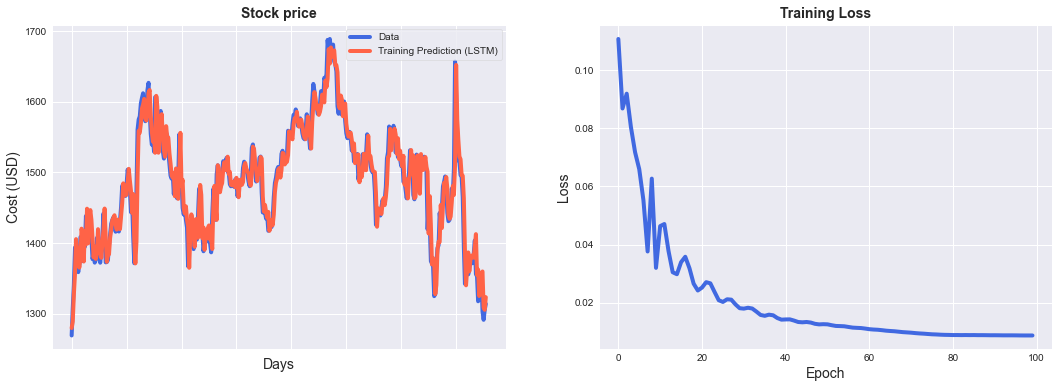

In [124]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)


In [125]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 24.23 RMSE
Test Score: 17.03 RMSE


In [126]:
# make one prediction with an LSTM
pre= model(x_test)

In [127]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [128]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [129]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.2140514850616455
Epoch  1 MSE:  0.100347138941288
Epoch  2 MSE:  0.10284048318862915
Epoch  3 MSE:  0.09647819399833679
Epoch  4 MSE:  0.07413888722658157
Epoch  5 MSE:  0.06815764307975769
Epoch  6 MSE:  0.06904419511556625
Epoch  7 MSE:  0.06361697614192963
Epoch  8 MSE:  0.05023547261953354
Epoch  9 MSE:  0.036456260830163956
Epoch  10 MSE:  0.03232366964221001
Epoch  11 MSE:  0.032368358224630356
Epoch  12 MSE:  0.02295660600066185
Epoch  13 MSE:  0.018745459616184235
Epoch  14 MSE:  0.02716725505888462
Epoch  15 MSE:  0.027079127728939056
Epoch  16 MSE:  0.019776951521635056
Epoch  17 MSE:  0.016531499102711678
Epoch  18 MSE:  0.017025643959641457
Epoch  19 MSE:  0.01599317416548729
Epoch  20 MSE:  0.014185644686222076
Epoch  21 MSE:  0.014112996868789196
Epoch  22 MSE:  0.01528970617800951
Epoch  23 MSE:  0.015833254903554916
Epoch  24 MSE:  0.014922967180609703
Epoch  25 MSE:  0.013310642912983894
Epoch  26 MSE:  0.012317469343543053
Epoch  27 MSE:  0.0123155433

In [130]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

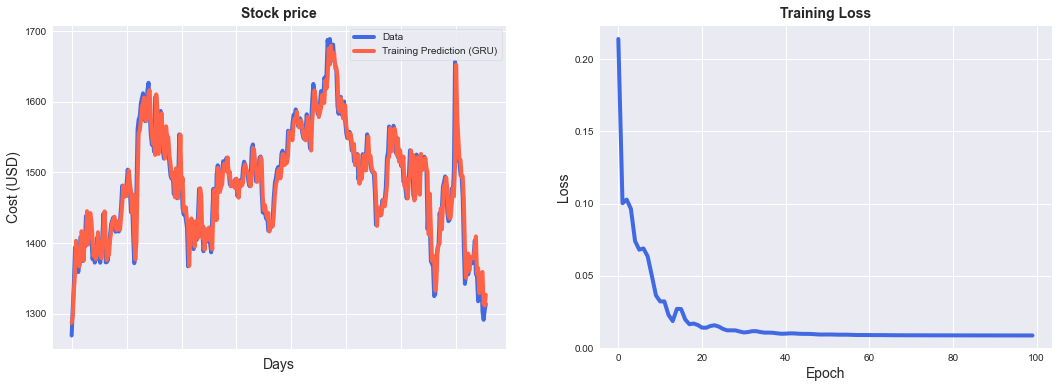

In [131]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [132]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 24.30 RMSE
Test Score: 17.63 RMSE


In [133]:
lstm = pd.DataFrame(lstm, columns=['LSTM'])
gru = pd.DataFrame(gru, columns=['GRU'])
result = pd.concat([lstm, gru], axis=1, join='inner')
result.index = ['Train RMSE', 'Test RMSE', 'Train Time']
result

,LSTM,GRU
Train RMSE,24.231385,24.303217
Test RMSE,17.034428,17.627450
Train Time,8.753842,5.318743


In [134]:
# make predictions taking last 30 days of data
data = df['Close'][-30:].values
data = torch.from_numpy(data).type(torch.Tensor)
data.size()


torch.Size([30])

In [135]:
pred= model(data)

RuntimeError: For unbatched 2-D input, hx should also be 2-D but got 3-D tensor